In [1]:
from IPython.display import Image
import pandas as pd
import numpy as np

# 1. GBM의 개요

* **부스팅 알고리즘** : 여러 개의 약한 학습기(weak learner)를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해나가며 학습하는 방식
  - 대표적으로 AdaBoost와 Gradient Boost가 있음

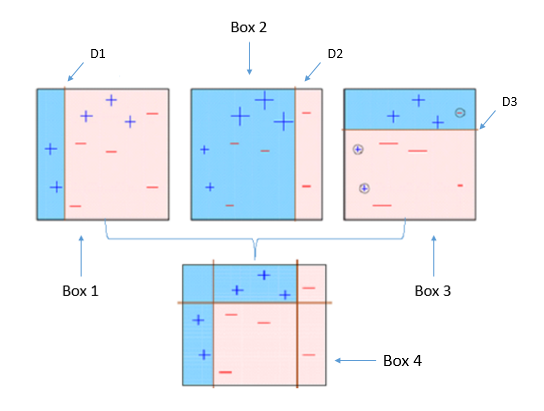

In [2]:
Image('image/AdaBoost.png', width = 500)

### **AdaBoost**의 학습 방식

 **Step 1)** 첫 번째 약한 학습기가 첫번째 분류기준(D1)으로 + 와 - 를 분류 

 **Step 2)** 잘못 분류된 데이터에 대해 가중치를 부여(두 번쨰 그림에서 커진 + 표시)
 
 **Step 3)** 두 번째 약한 학습기가 두번째 분류기준(D2)으로 +와 - 를 다시 분류
 
 **Step 4)** 잘못 분류된 데이터에 대해 가중치를 부여(세 번째 그림에서 커진 - 표시)
 
 **Step 5)** 세 번째 약한 학습기가 세번째 분류기준으로(D3) +와 -를 다시 분류해서 오류 데이터를 찾음
 
 **Step 6)** 마지막으로 분류기들을 결합하여 최종 예측 수행
 
 --> 약한 학습기를 순차적으로 학습시켜, 개별 학습기에 가중치를 부여하여 모두 결합함으로써 개별 약한 학습기보다 높은 정확도의 예측 결과를 만듦

### Gradient Boost Machine의 학습 방식

AdaBoost와 유사하지만, 가중치 업데이트를 경사하강법(Gradient Descent)를 이용하는 것이 큰 차이

 - 경사하강법 : 
  분류의 실제값을 y, 피처에 기반한 예측함수를 F(x), 오류식을 h(x) = y-F(x)라고 하면 이 오류식을 최소화하는 방향성을 가지고 가중치 값을 업데이트

In [3]:
# 예시 데이터셋 불러오기

# 각 데이터 파일들은 공백으로 분리되어 있어, read_csv에서 공백 문자를 sep으로 할당
feature_name_df = pd.read_csv('UCI HAR Dataset/features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])

# 데이터프레임에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
feature_name = feature_name_df.iloc[:, 1].values.tolist()
feature_name

# 학습 피처 데이터 세트와 테스트 피처 데이터를 데이터프레임으로 로딩, 컬렴명을 feature_name 적용
X_train = pd.read_csv('UCI HAR Dataset/train/X_train.txt', sep='\s+', names=feature_name)
X_test = pd.read_csv('UCI HAR Dataset/test/X_test.txt', sep='\s+', names=feature_name)

# 학습레이블과 테스트 레이블 데이터를 데이터 프레임으로 로딩하고 컬렴명은 action으로 부여
y_train = pd.read_csv('UCI HAR Dataset/train/y_train.txt', sep='\s+', header=None, names=['action'])
y_test = pd.read_csv('UCI HAR Dataset/test/y_test.txt', sep='\s+', header=None, names=['action'])

/anaconda3/lib/python3.7/site-packages/pandas/io/parsers.py:702: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


In [4]:
# Gradient Boosting Classifier 불러오기
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.metrics import accuracy_score
import time

# GBM 수행시간 측정을 위함. 시작시간 설정
start_time = time.time()

# 예시 데이터셋 불러오기
gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {:.4f}'.format(gb_accuracy))
print('GBM 수행 시간: {:.1f}초'.format(time.time() - start_time))

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GBM 정확도: 0.9376
GBM 수행 시간: 144.2초


* 예측 성능은 높지만 수행시간이 오래 걸리며 하이퍼 파라미터 튜닝에 많은 노력이 필요하다는 단점이 존재

# 2. GBM 하이퍼 파라미터 및 튜닝

* **n_estimators**  
   - weak_learner의 갯수(default = 100)
   - 많을 수록 예측 성능이 좋아지지만 너무 많으면 시간이 오래 걸림
* **max_depth** 
   - 트리의 최대 깊이(default=None)
   - None :  완벽하게 클래스 결정 값이 될 때까지 계속해서 깊이를 키우며 분할하거나, 각 노드 데이터 개수가 min_sample_split보다 작아질 때까지 계속 깊이를 증가시킴
* **max_features** 
  - 트리의 최대 깊이(default=None)
  - default 값 : None 
* **loss** : 경사하강법에서 사용할 cost function를 지정, 특별한 이유가 없으면 default 값인 deviance를 그대로 적용
* **learning rate** 
  - GBM이 학습을 진행할 때마다 적용하는 학습률 (default = 0.1 이며 0~1 사이의 값을 지정할 수 있음)
  - 너무 작은 값을 적용하면 업데이터 되는 값이 작아져서 최소 오류 값을 찾아 예측 성능이 높아질 수도 있음
  - 하지만 너무 많은 시간이 걸리게 되고, 너무 작게 설정 시 모든 weak learner의 반복이 완료되어도 최소 오류 값을 찾지 못할 수 있음
  - 반대로 큰 값을 적용하면 최소 오류 값을 찾지 못하고 그냥 지나쳐버려 예측 성능이 떨어질 수 있음
* **subsample** 
  - weak learner가 학습에 사용하는 데이터의 샘플링 비율(default = 1)
  - 1이면 학습 데이터 전체를 기반으로 학습한다는 의미로, 과적합이 염려되는 경우 1보다 작은 값으로 설정

In [5]:
from sklearn.model_selection import GridSearchCV

param = {
    'n_estimators' : [100, 500],
    'learning_rate' : [0.05, 0.1]
}

grid_cv = GridSearchCV(gb_clf, param_grid=param, cv=2, verbose=1)
grid_cv.fit(X_train, y_train)
print('최적 하이퍼 파라미터: \n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d ar

최적 하이퍼 파라미터: 
 {'learning_rate': 0.1, 'n_estimators': 500}
최고 예측 정확도: 0.9014


* 위의 간단한 그리드서치에서는 learning_rate = 0.05, n_estimator = 500 일 때 , 90.1% 정확도가 최고로 도출되었음

In [6]:
# GridSearchCV를 이용해 최적으로 학습된 estimators로 예측 수행
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))

GBM 정확도: 0.9403


* 테스트 데이터 세트에서 약 94.1%의 정확도를 나타냄

* GBM은 과적합에도 뛰어난 예측 성능을 가진 알고리즘이지만 수행시간이 오래 걸린다는 단점이 있음